#ANOMALY DETECTION IN SATELLITES

The various components of the dataset are:
num_rows: This variable specifies the number of data points (rows) you're generating for your dataset. In this case, you're creating 10,000 data points.

satellite_ids: This is a list that assigns a unique identifier to each satellite in your dataset. The format 'SAT{:03}' generates identifiers like "SAT001", "SAT002", and so on, ensuring each identifier is three digits long.

timestamps: This list contains timestamps for each data point. You're generating these timestamps in 60-second intervals, starting from January 1, 2023.

data: This is a dictionary containing various components of your dataset. Let's break down each key:

Timestamp: Holds the datetime values generated in the timestamps list.

Satellite ID: Contains the unique identifiers for each satellite, generated using the satellite_ids list.

Temperature (C): Random temperature values between 20°C and 30°C for each satellite data point.

Voltage (V): Random voltage values between 28V and 32V for each satellite data point.

Thrust (N): Random thrust values between 1400N and 1600N for each satellite data point.

Gyroscope X (rad/s), Gyroscope Y (rad/s), Gyroscope Z (rad/s): Random gyroscope readings for each axis, ranging from -0.1 rad/s to 0.1 rad/s.

Solar Panel: A list of random binary choices (0 or 1), where 1 represents a malfunction and 0 represents normal operation.

Communication Systems, Power Distribution, Sensor Degradation, Thermal Control: Lists of random binary choices representing the status of different systems, similar to the "Solar Panel" feature.

Anomaly Label: This indicates whether an anomaly is present (1) or not (0) for each data point. You're randomly assigning these labels using random.choice([0, 1]).

In [ ]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import random
from datetime import datetime, timedelta

In [ ]:
# Generate a large simulated dataset
num_rows = 10000
satellite_ids = ['SAT{:03}'.format(i+1) for i in range(num_rows)]
timestamps = [datetime(2023, 1, 1) + timedelta(seconds=i*60) for i in range(num_rows)]

data = {
    'Timestamp': timestamps,
    'Satellite ID': satellite_ids,
    'Temperature (C)': [random.uniform(20, 30) for _ in range(num_rows)],
    'Voltage (V)': [random.uniform(28, 32) for _ in range(num_rows)],
    'Thrust (N)': [random.randint(1400, 1600) for _ in range(num_rows)],
    'Gyroscope X (rad/s)': [random.uniform(-0.1, 0.1) for _ in range(num_rows)],
    'Gyroscope Y (rad/s)': [random.uniform(-0.1, 0.1) for _ in range(num_rows)],
    'Gyroscope Z (rad/s)': [random.uniform(-0.1, 0.1) for _ in range(num_rows)],
    'Solar Panel': [random.choice([0, 1]) for _ in range(num_rows)],  # 1: malfunction, 0: normal
    'Communication Systems': [random.choice([0, 1]) for _ in range(num_rows)],
    'Power Distribution': [random.choice([0, 1]) for _ in range(num_rows)],
    'Sensor Degradation': [random.choice([0, 1]) for _ in range(num_rows)],
    'Thermal Control': [random.choice([0, 1]) for _ in range(num_rows)],
    'Anomaly Label': [random.choice([0,1]) for _ in range(num_rows)],
}

df = pd.DataFrame(data)
df.to_csv('telemetry_data.csv', index=False)

In [ ]:
type(data)

dict

In [ ]:
df.shape

(10000, 14)

In [ ]:
print(df.columns)

Index(['Timestamp', 'Satellite ID', 'Temperature (C)', 'Voltage (V)',
       'Thrust (N)', 'Gyroscope X (rad/s)', 'Gyroscope Y (rad/s)',
       'Gyroscope Z (rad/s)', 'Solar Panel', 'Communication Systems',
       'Power Distribution', 'Sensor Degradation', 'Thermal Control',
       'Anomaly Label'],
      dtype='object')


In [ ]:
df.head()

,Timestamp,Satellite ID,Temperature (C),Voltage (V),Thrust (N),Gyroscope X (rad/s),Gyroscope Y (rad/s),Gyroscope Z (rad/s),Solar Panel,Communication Systems,Power Distribution,Sensor Degradation,Thermal Control,Anomaly Label
0,2023-01-01 00:00:00,SAT001,23.661114,30.346465,1533,-0.036606,0.046625,0.050657,1,0,1,1,0,1
1,2023-01-01 00:01:00,SAT002,22.401439,28.210281,1498,0.023282,-0.083154,0.051391,0,0,1,0,0,0
2,2023-01-01 00:02:00,SAT003,23.970591,31.982460,1440,0.013980,0.032470,-0.077535,1,0,1,0,1,1
3,2023-01-01 00:03:00,SAT004,21.728059,30.748731,1421,0.012867,-0.053797,-0.038163,1,0,0,0,1,0
4,2023-01-01 00:04:00,SAT005,24.055197,30.425268,1552,-0.006818,0.041504,0.023204,1,0,1,0,0,1


In [ ]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              10000 non-null  datetime64[ns]
 1   Satellite ID           10000 non-null  object        
 2   Temperature (C)        10000 non-null  float64       
 3   Voltage (V)            10000 non-null  float64       
 4   Thrust (N)             10000 non-null  int64         
 5   Gyroscope X (rad/s)    10000 non-null  float64       
 6   Gyroscope Y (rad/s)    10000 non-null  float64       
 7   Gyroscope Z (rad/s)    10000 non-null  float64       
 8   Solar Panel            10000 non-null  int64         
 9   Communication Systems  10000 non-null  int64         
 10  Power Distribution     10000 non-null  int64         
 11  Sensor Degradation     10000 non-null  int64         
 12  Thermal Control        10000 non-null  int64         
 13  An

In [ ]:
df.describe()

,Temperature (C),Voltage (V),Thrust (N),Gyroscope X (rad/s),Gyroscope Y (rad/s),Gyroscope Z (rad/s),Solar Panel,Communication Systems,Power Distribution,Sensor Degradation,Thermal Control,Anomaly Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,25.025334,30.009356,1500.068300,-0.000005,-0.000467,0.000058,0.50670,0.502400,0.493500,0.489000,0.490500,0.493200
std,2.865446,1.155755,57.927494,0.057444,0.057959,0.057628,0.49998,0.500019,0.499983,0.499904,0.499935,0.499979
min,20.000612,28.000165,1400.000000,-0.099976,-0.099943,-0.099990,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.590415,29.016982,1449.000000,-0.049696,-0.050771,-0.050019,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.058014,30.020198,1500.000000,0.000399,-0.000636,0.000939,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,27.485424,31.015353,1550.000000,0.049468,0.049214,0.050130,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,29.997598,31.999214,1600.000000,0.099967,0.099992,0.099985,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#DATA CLEANING
#check for missing values
df.isnull().sum()

Timestamp                0
Satellite ID             0
Temperature (C)          0
Voltage (V)              0
Thrust (N)               0
Gyroscope X (rad/s)      0
Gyroscope Y (rad/s)      0
Gyroscope Z (rad/s)      0
Solar Panel              0
Communication Systems    0
Power Distribution       0
Sensor Degradation       0
Thermal Control          0
Anomaly Label            0
dtype: int64

Data is already clean.There are no NaN values.

#DATA VISUALISATION

In [ ]:
 df['Solar Panel'].value_counts()

1    5067
0    4933
Name: Solar Panel, dtype: int64

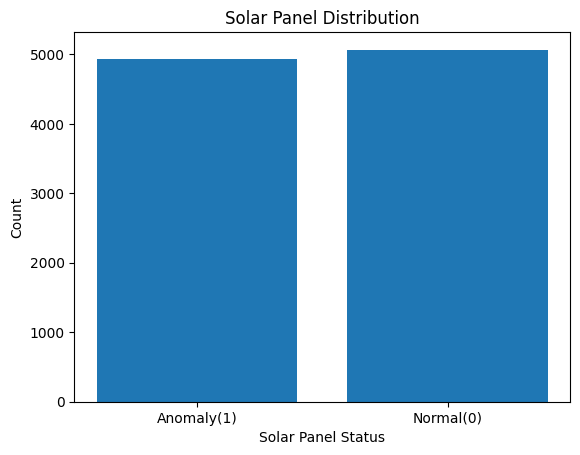

In [ ]:
solar_panel_counts = df['Solar Panel'].value_counts()
plt.bar(solar_panel_counts.index, solar_panel_counts.values, tick_label=['Normal(0)', 'Anomaly(1)'])

plt.xlabel('Solar Panel Status')
plt.ylabel('Count')
plt.title('Solar Panel Distribution')

plt.show()

The "Normal(0)" bar is relatively higher, this implies that substantial portion of the "Solar Panel" data points do not have anomalies.

By comparing the heights of these bars, we can get an idea of the overall balance between normal and anomalous data points in this dataset. This information can be helpful for understanding the prevalence of anomalies and potentially for developing anomaly detection models or strategies.

In [ ]:
df['Communication Systems'].value_counts()

1    5024
0    4976
Name: Communication Systems, dtype: int64

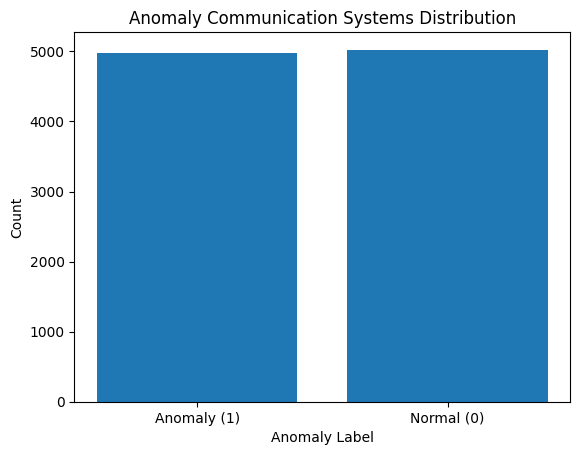

In [ ]:
label_counts = df['Communication Systems'].value_counts()
plt.bar(label_counts.index, label_counts.values, tick_label=[ 'Normal (0)', 'Anomaly (1)'])

plt.xlabel('Anomaly Label')
plt.ylabel('Count')
plt.title('Anomaly Communication Systems Distribution')

plt.show()

The "Normal(0)" bar is relatively higher, this implies that substantial portion of the "Communication Systems" data points do not have anomalies.

In [ ]:
df['Power Distribution'].value_counts()

0    5065
1    4935
Name: Power Distribution, dtype: int64

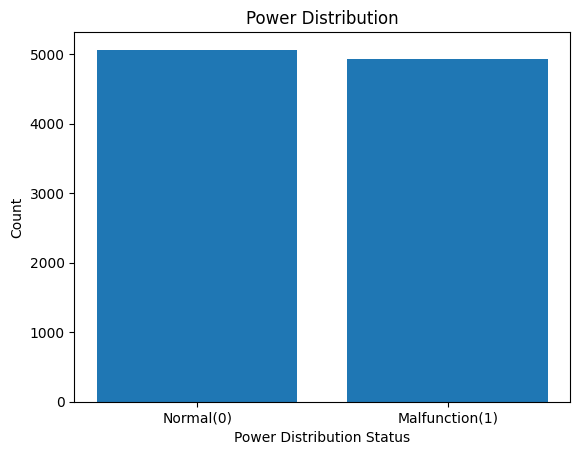

In [ ]:
power_distribution_counts = df['Power Distribution'].value_counts()

plt.bar(power_distribution_counts.index, power_distribution_counts.values, tick_label=['Normal(0)', 'Malfunction(1)'])

plt.xlabel('Power Distribution Status')
plt.ylabel('Count')
plt.title('Power Distribution')

plt.show()


The "Normal (0)" bar is significantly higher, it indicates that most of the data points have a normal status for the "Power Distribution" subsystem.

In [ ]:
df['Sensor Degradation'].value_counts()

0    5110
1    4890
Name: Sensor Degradation, dtype: int64

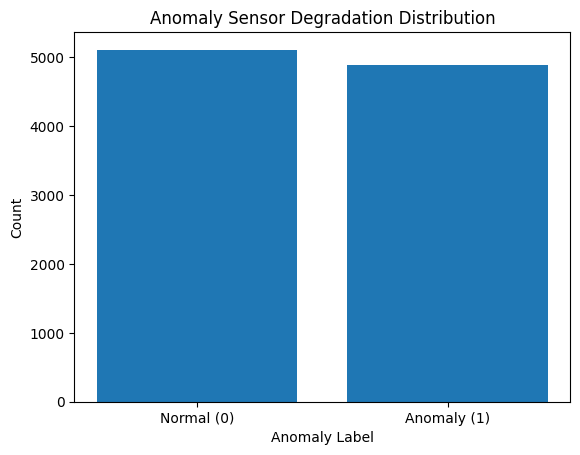

In [ ]:
label_counts = df['Sensor Degradation'].value_counts()
plt.bar(label_counts.index, label_counts.values, tick_label=[ 'Normal (0)', 'Anomaly (1)'])

plt.xlabel('Anomaly Label')
plt.ylabel('Count')
plt.title('Anomaly Sensor Degradation Distribution')

plt.show()

The "Normal (0)" bar is considerably taller, it suggests that the majority of data points are labeled as having a normal status for the "Sensor Degradation" subsystem.

CORRELATION MATRIX

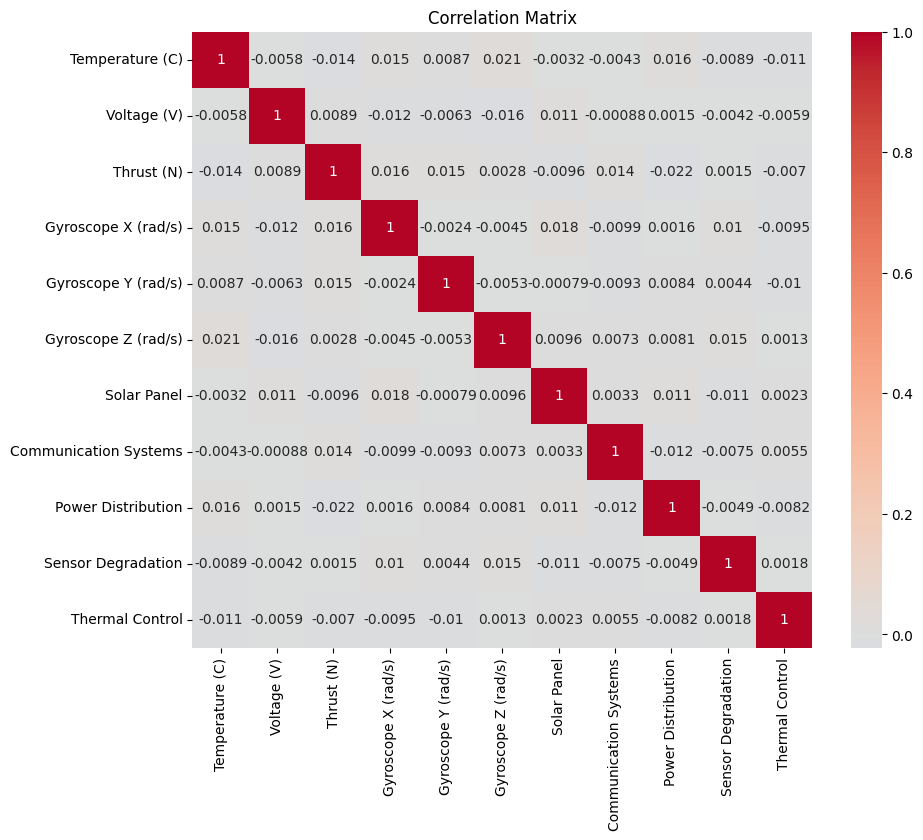

In [ ]:
correlation_columns = ['Temperature (C)', 'Voltage (V)', 'Thrust (N)',
                       'Gyroscope X (rad/s)', 'Gyroscope Y (rad/s)', 'Gyroscope Z (rad/s)',
                       'Solar Panel', 'Communication Systems', 'Power Distribution',
                       'Sensor Degradation', 'Thermal Control']

correlation_matrix = df[correlation_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

A correlation matrix is a table showing the correlation coefficients between different sets of variables.In a correlation matrix, each cell represents the correlation coefficient between two variables. The correlation coefficient ranges from -1 to 1:

Red tones indicate positive correlations: As one variable increases, the other tends to increase.

The intensity of color indicates the strength of the correlation. Darker shades (closer to -1 or 1) suggest stronger correlations, while lighter shades (closer to 0) suggest weaker or no correlations.



#TRAIN-TEST SPLITTING

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('telemetry_data.csv')

features = df.drop(columns=['Timestamp', 'Satellite ID', 'Anomaly Label'])
target = df['Anomaly Label']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print("Train dataset shape:", X_train.shape)
print("Test dataset shape:", X_test.shape)


Train dataset shape: (8000, 11)
Test dataset shape: (2000, 11)


#MODEL SELECTION

1. ISOLATION FOREST

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score

isolation_forest = IsolationForest(contamination=0.01, random_state=42)
isolation_forest.fit(X_train)

y_pred = isolation_forest.predict(X_test)

y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)

print("Accuracy:", accuracy)

Accuracy: 0.509


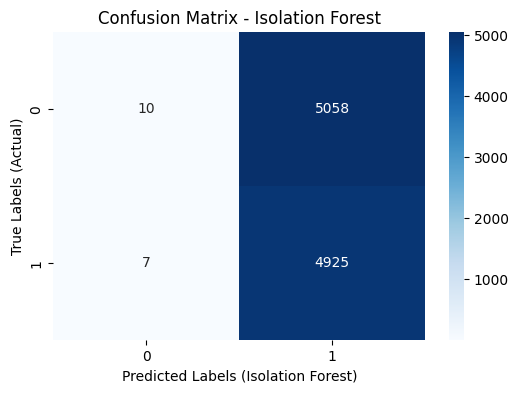

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)

features = ['Temperature (C)', 'Voltage (V)', 'Thrust (N)',
            'Gyroscope X (rad/s)', 'Gyroscope Y (rad/s)', 'Gyroscope Z (rad/s)',
            'Solar Panel', 'Communication Systems', 'Power Distribution',
            'Sensor Degradation', 'Thermal Control']

X = df[features]

model = IsolationForest(contamination='auto', random_state=42)
model.fit(X)

predictions = model.predict(X)
#(1 for anomalies, -1 for normal)
binary_predictions = np.where(predictions == -1, 1, 0)

confusion_matrix = pd.crosstab(df['Anomaly Label'], binary_predictions, rownames=['Actual'], colnames=['Predicted'])

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels (Isolation Forest)')
plt.ylabel('True Labels (Actual)')
plt.title('Confusion Matrix - Isolation Forest')
plt.show()

2. LOGISTIC REGRESSION

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(['Anomaly Label', 'Timestamp', 'Satellite ID'], axis=1)
y = df['Anomaly Label']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5085


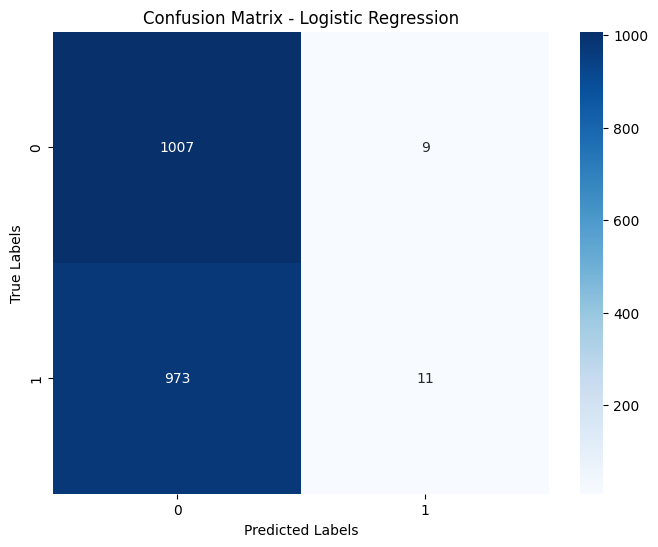

In [ ]:
#CONFUSION MATRIX
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

3. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.5015


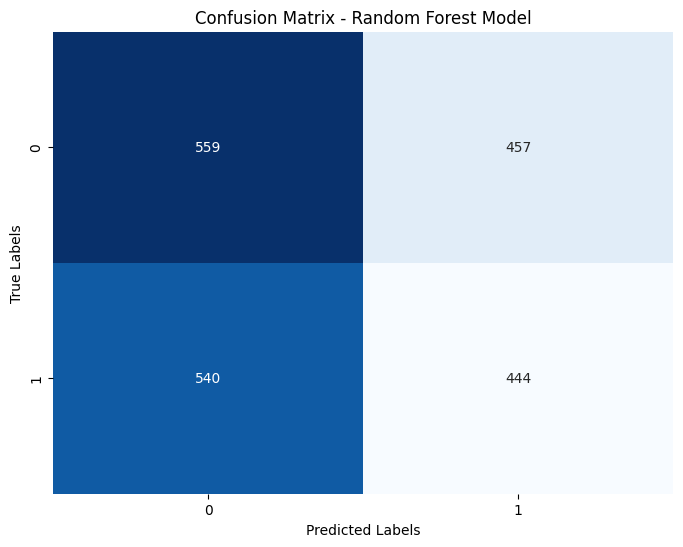

In [ ]:
#CONFUSION MATRIX
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


4. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train k-NN model
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5


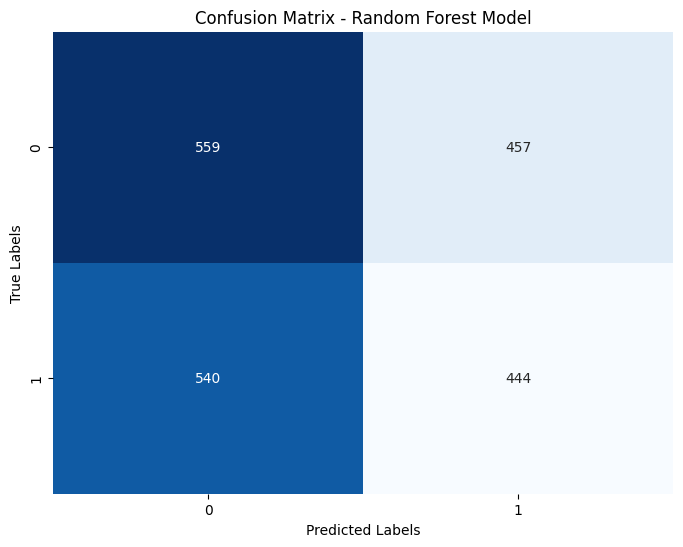

In [ ]:
from sklearn.metrics import confusion_matrix
import random
from datetime import datetime, timedelta

# Generate example data (replace this with your dataset loading)
num_rows = 10000

confusion = confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion, index=['Actual Normal', 'Actual Anomaly'], columns=['Predicted Normal', 'Predicted Anomaly'])
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Model')
plt.show()


#COMPARING THE MODELS

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialize models
models = {
    'Isolation Forest': IsolationForest(contamination=0.05, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Confusion Matrix:\n{confusion}\n")


Model: Isolation Forest
Accuracy: 0.4655
Confusion Matrix:
[[  0   0   0]
 [ 61   0 955]
 [ 53   0 931]]

Model: Logistic Regression
Accuracy: 0.5085
Confusion Matrix:
[[653 363]
 [620 364]]

Model: Random Forest
Accuracy: 0.4940
Confusion Matrix:
[[552 464]
 [548 436]]

Model: k-Nearest Neighbors
Accuracy: 0.5000
Confusion Matrix:
[[520 496]
 [504 480]]



From the models comparison, we can conclude that KNN works best for the anomly type of dataset.
Isolation Forest gives less accuracy as compared to the other models.(Although, all the models compared above give almost the same accuracy.)